<a href="https://colab.research.google.com/github/j0k3rD/Artificial-Intelligence/blob/main/pr%C3%A1ctica_01_regresi%C3%B3n_lineal_multivariante_A_MOYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font style: color='lime'>Regresión Lineal Multivariante</font>

En este tipo de regresión, a diferencia de la regresión **lineal simple**, tenemos más de una variable explicativa dentro de la ecuación de regresión.

`y = ß0 + ß1X1 + ß2X2 + ... + ßnXn`

---

Para este ejercicio vamos a usar el dataset que está en el siguiente link:
https://www.kaggle.com/datasets/snehasishdhar/simple-house-price-prediction

Deberán entrar en ese link, deslizarse hasta abajo hasta ver las opciones del dataset. En el icono de la flecha para abajo (descarga) le dan para bajar el dataset en sus computadoras locales (con formato .csv)
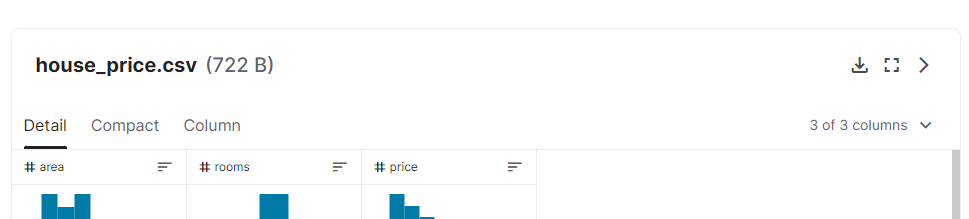
Luego deberán subirlo a este notebook para que `Pandas` lo pueda reconocer. Para esto en el panel de la izquierda, abren el símbolo de carpeta, y hacen click derecho dentro del panel donde aparecerá la opción de subir archivo:
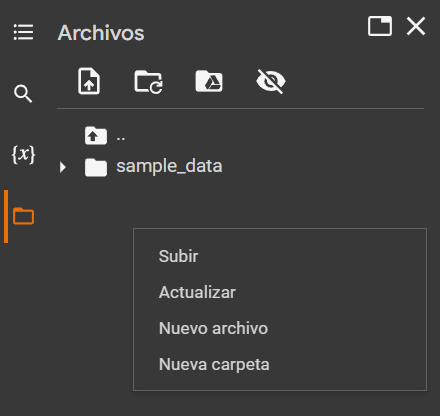


## Práctica del notebook:

En este notebook trabajaremos con un conjunto de datos o `dataset` de precios de casas, las cuales estan tasadas en base a dos variables: los m2 de la casa y la cantidad de habitaciones.

Por lo que va a ser una práctica de regresión.

Analizando los datos veremos si es lineal o no.

1. Primeramente empezaremos tomando una sola variable, para tratar de hacer una `regresión lineal simple`
2. Luego trabajaremos con ambas variables, para tratar de hacer una `regresión lineal multiple/multivariante`



---



# Una variable: regresión lineal simple

## 1. Cargamos el dataset

Para esto usaremos `Pandas`, esta librería nos permite trabajar con archivos de formato .xlsx, .csv ,.json transformandolos a un objeto de Pandas que se llama `DataFrame`. Nos organiza la información en tabla, y dicha tabla posee atributos y funcionalidades.

In [2]:
import pandas as pd
data = pd.read_csv('house_price.csv') # también pueden escribir pd.read_csv('house_price.csv')

In [3]:
#para ver los primeros datos usamos la función .head() con el parámetro "5" para ver las primeras 5 filas
data.head(5)

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 2. Elegimos una sola variable

En mi caso, voy a elegir solo `area` como variable **X** y voy a intentar modelar la relación con `price`, es decir, esta va a ser la variable **y**.

In [4]:
X = data['area'].to_numpy() #seleccionamos solo la columna "area" como datos de la variable independiente X
y = data['price'].to_numpy() #seleccionamos la columna "price" como datos para supervisar el entrenamiento

In [5]:
# Observamos 5 ejemplos de los datos en X e y
# También observamos el formato y la cantidad de datos que hay en cada variable
print(f"X ('area') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)} | 5 ejemplos se ven así: {X[:5]}\n")
print(f"Y ('price') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)} | 5 ejemplos se ven así: {y[:5]}")

X ('area') tiene la forma: (47,) | posee cantidad de datos: 47 | 5 ejemplos se ven así: [2104 1600 2400 1416 3000]

Y ('price') tiene la forma: (47,) | posee cantidad de datos: 47 | 5 ejemplos se ven así: [399900 329900 369000 232000 539900]


## 3. Analizamos el dataset

Para esto analizaremos las siguientes características:

1. Normalidad de los datos.
2. Como se distribuyen.
3. Correlación

In [6]:
# Normalidad la calculamos usando el test de Shapiro-Wilk
from scipy.stats import shapiro
normalidad_X = shapiro(X) #evaluamos normalidad de los datos de X
normalidad_y = shapiro(y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X: {normalidad_X}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X: ShapiroResult(statistic=0.8921357989311218, pvalue=0.0004080278449691832)
Normalidad de y: ShapiroResult(statistic=0.8969053626060486, pvalue=0.000574608042370528)


>**Nota:** vemos que para ambos conjuntos de datos X e y, el p-value es < 0.05 por lo cual se rechaza la hipotesis nula (H0) de que se distribuyen de forma normal. Habría que analizar que "otra forma de distribución pueden tener". Esto se los dejo para que vean como la estadística es importante. Al saber que no se distribuyen de forma normal no se puede hacer un teste de correlación de Pearson, pero si tal vez de Kendall...


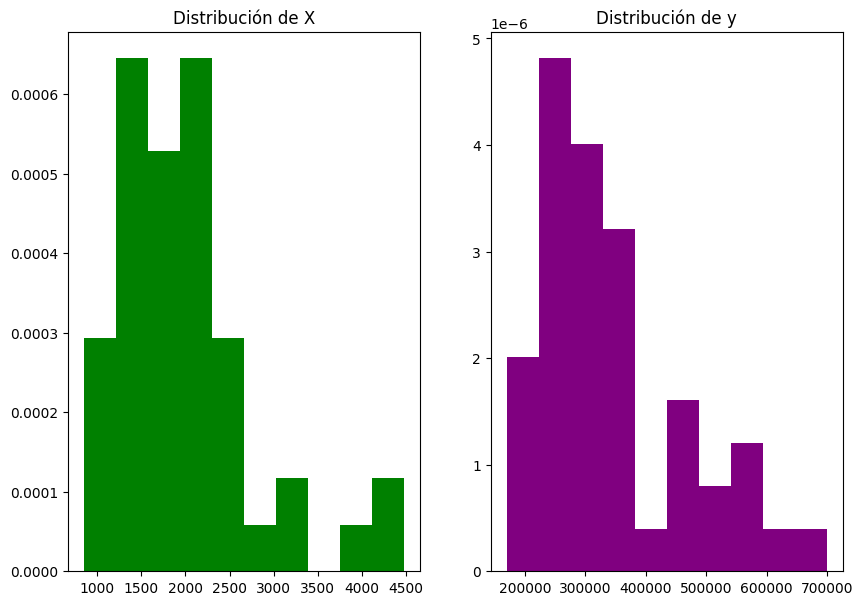

In [7]:
#Vemos como se distribuyen ambos conjuntos de datos X e Y
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.hist(X,color='green',density=True)
plt.title("Distribución de X")
plt.subplot(1,2,2)
plt.hist(y,color='purple',density=True)
plt.title("Distribución de y");

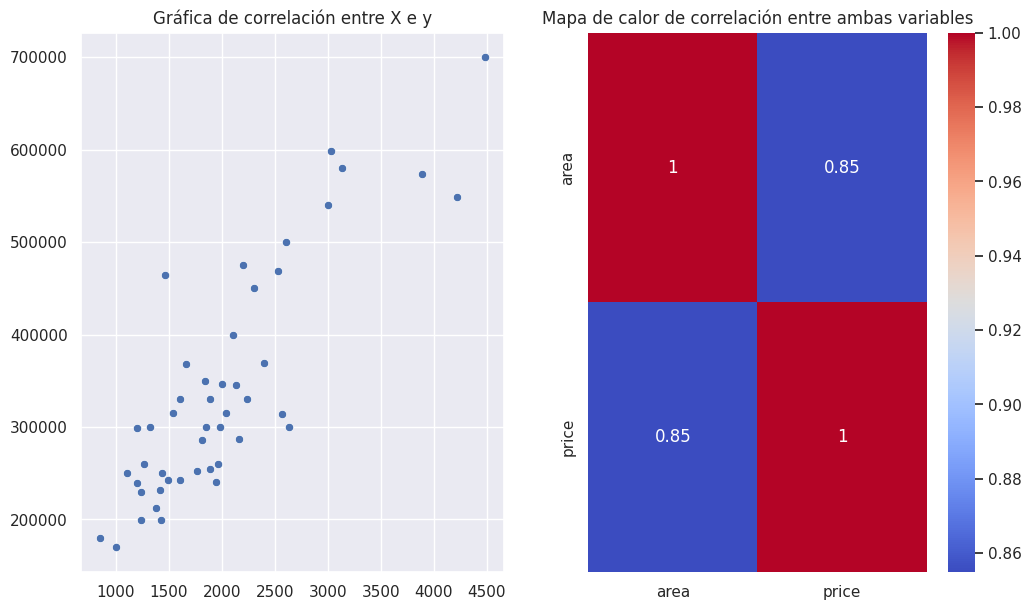

In [8]:
#Vemos si se correlacionan para eso podemos hacer una gráfica de scatter plot o un mapa de calor o un pairplot
#Hacemos primero un scatterplot con un mapa de calor

import seaborn as sns
sns.set()

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.scatterplot(x=X, y=y)
plt.title("Gráfica de correlación entre X e y")
plt.subplot(1,2,2)
sns.heatmap(data[["area","price"]].corr(), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

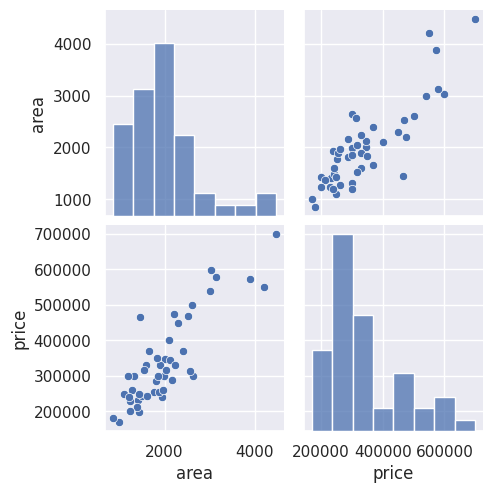

In [9]:
#Luego hacemos un pairplot
sns.pairplot(data[["area","price"]]);

> **Nota:** Este análisis de correlación nos muestra que gráficamente tanto en `scatterplot` como en `pairplot` podemos ver que una variable en función de la otra se tienen cierta orientación de forma lineal, con una cierto grado de varianza. Esto se debe a que los datos no se distribuyen de igual manera y mucho menos de forma normal.
Por otro lado el mapa de calor nos muestra el `valor` de la correlación entre las variables que es de 0.85, lo cual es bastante alto, osea que hay una buena correlación directamente proporcional.

## 4. Separamos el dataset en entrenamiento y testeo

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (35,) | ytrain shape (35,)
Xtest shape: (12,) | ytest shape (12,)


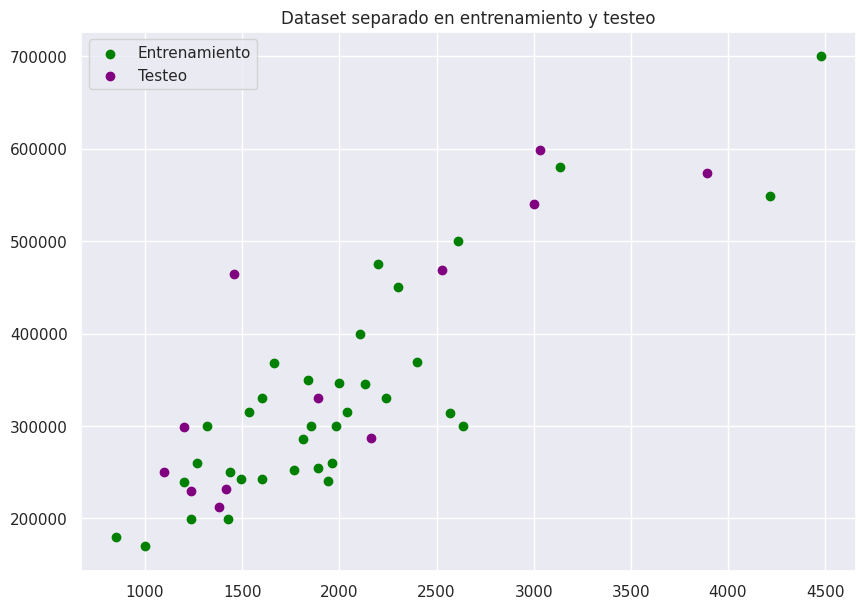

In [12]:
# Vemos gráficamente como queda el dataset separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain,ytrain,c='green',label='Entrenamiento')
plt.scatter(Xtest,ytest,c='purple',label='Testeo')
plt.legend()
plt.title("Dataset separado en entrenamiento y testeo");

>**Nota:** Podemos ver que los datos son muy pocos del dataset original (47) por lo que al separar 70% para entrenar y 20% para testeo hace que este último se componga de muy poco datos, pero a los fines de la práctica servirá

## 5. Entrenamos el modelo de regresión lineal simple

In [13]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [14]:
linear_model.fit(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1)) #entrenamos el modelo con la función .fit()

LinearRegression()

In [15]:
#Vemos el coefficiente e intercepto que "aprendió" el modelo que mejor se ajustan a la relación lineal
print(f"Coeficiente que acompaña a la variable de entrada: {linear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {linear_model.intercept_}")

Coeficiente que acompaña a la variable de entrada: [[132.82540391]]
Intercepto que corta al eje de ordenadas: [64287.20945688]


Entonces el modelo final quedaría algo así:

`y = 132.82540391*X0 + 64287.20945688`

## 6. Evaluamos el modelo lineal entrenado

In [16]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {linear_model.score(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1)):.2f}")
print(f"Valor de métrica R2 con el conjunto de testeo: {linear_model.score(Xtest.reshape(-1, 1),ytest.reshape(-1, 1)):.2f}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.76
Valor de métrica R2 con el conjunto de testeo: 0.64


In [17]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_pred = linear_model.predict(Xtest.reshape(-1, 1)).squeeze() #la función squeeze() es para quitar dimensiones extras, ej: (12,1) -> (12,) ya que las dimensiones extras solo sirven para entrenar
y_train_pred = linear_model.predict(Xtrain.reshape(-1, 1)).squeeze()
y_test_pred.shape, y_train_pred.shape

((12,), (35,))

In [18]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae:.2f}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae:.2f}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse:.2f}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse:.2f}")

Valor de métrica MAE con el conjunto de testeo: 61919.48
Valor de métrica MAE con el conjunto de entrenamiento: 47461.86

Valor de métrica MSE con el conjunto de testeo: 7016177916.20
Valor de métrica MSE con el conjunto de entrenamiento: 3269210944.67


In [19]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {y.max()} | Price minimo: {y.min()} | Price promedio: {y.mean():.2f} | Varianza de los datos de entrada X: {X.var():.2f}")

Price maximo: 699900 | Price minimo: 169900 | Price promedio: 340412.66 | Varianza de los datos de entrada X: 618114.56


In [20]:
print(f"Entonces el error en testeo es de una proporcion de {(test_mae/y.mean())*100:.2f}%")

Entonces el error en testeo es de una proporcion de 18.19%


In [22]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

469000 vs 399804.18 --> diferencia = 69195.82 --> error: 14.75%
287000 vs 351455.73 --> diferencia = -64455.73 --> error: -22.46%
464500 vs 257946.65 --> diferencia = 206553.35 --> error: 44.47%
299000 vs 223677.69 --> diferencia = 75322.31 --> error: 25.19%
573900 vs 580978.03 --> diferencia = -7078.03 --> error: -1.23%
229900 vs 228857.88 --> diferencia = 1042.12 --> error: 0.45%
329999 vs 315327.22 --> diferencia = 14671.78 --> error: 4.45%
599000 vs 466881.01 --> diferencia = 132118.99 --> error: 22.06%
539900 vs 462763.42 --> diferencia = 77136.58 --> error: 14.29%
249900 vs 210395.15 --> diferencia = 39504.85 --> error: 15.81%
212000 vs 247586.27 --> diferencia = -35586.27 --> error: -16.79%
232000 vs 252367.98 --> diferencia = -20367.98 --> error: -8.78%


In [23]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 15.89%


>🤔**Para pensar:** El modelo lineal que representa la relación entre los m2 de una vivienda y el precio de la misma posee un error inherente al modelo construido que es una `relación lineal` o dicho de otra forma una recta afín. Queda en el ingeniero en Machine Learning tener criterio de decidir si un modelo que valua una vivienda con un error de aprox 61919 USD es admisible. O habría que pensar en otra forma de buscar una relación entre los datos de entrada y el precio. Tal vez este modelo a la agencia de bienes raíces no le sirva porque la mayoría de las veces estaría tasando más bajo de lo que sale realmente una vivienda.



---



# Dos variables: regresión lineal múltiple

## 1. Cargamos el dataset

In [24]:
# A veces es mejor como buena práctica tener todos los importes antes del código
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as ms
from scipy.stats import shapiro
import seaborn as sns
sns.set()

In [25]:
data = pd.read_csv('house_price.csv')
data.head(5) #visualizamos los primeros 5 registros

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 2. Elegimos dos variables

In [26]:
X = data[["area","rooms"]].to_numpy() #esto también se puede lograr sacando la columna de price --> data.drop(columns='price')
y = data['price'].to_numpy()

In [27]:
# Observamos 5 ejemplos de los datos en X e y
# También observamos el formato y la cantidad de datos que hay en cada variable
print(f"X ('area','rooms') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)}\nAlgunos ejemplos se ven así:\n{X[:5]}")
print(f"\nY ('price') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)}\n5 ejemplos se ven así: {y[:5]}")

X ('area','rooms') tiene la forma: (47, 2) | posee cantidad de datos: 47
Algunos ejemplos se ven así:
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]

Y ('price') tiene la forma: (47,) | posee cantidad de datos: 47
5 ejemplos se ven así: [399900 329900 369000 232000 539900]


## 3. Analizamos el dataset

Para esto analizaremos las siguientes características:

1. Normalidad de los datos.
2. Como se distribuyen.
3. Correlación

In [28]:
# Normalidad la calculamos usando el test de Shapiro-Wilk
normalidad_X_area = shapiro(X[:,0]) #evaluamos normalidad de los datos de X ('area')
normalidad_X_rooms = shapiro(X[:,1]) #evaluamos normalidad de los datos de X ('rooms')
normalidad_y = shapiro(y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X_area: {normalidad_X_area}")
print(f"Normalidad de X_rooms: {normalidad_X_rooms}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X_area: ShapiroResult(statistic=0.8921357989311218, pvalue=0.0004080278449691832)
Normalidad de X_rooms: ShapiroResult(statistic=0.8501724004745483, pvalue=2.6101501134689897e-05)
Normalidad de y: ShapiroResult(statistic=0.8969053626060486, pvalue=0.000574608042370528)


>**Nota:** vemos que para ambos conjuntos de datos X e y, el p-value es < 0.05 por lo cual se rechaza la hipotesis nula (H0) de que se distribuyen de forma normal. Habría que analizar que "otra forma de distribución pueden tener". Esto se los dejo para que vean como la estadística es importante. Al saber que no se distribuyen de forma normal no se puede hacer un teste de correlación de Pearson, pero si tal vez de Kendall...


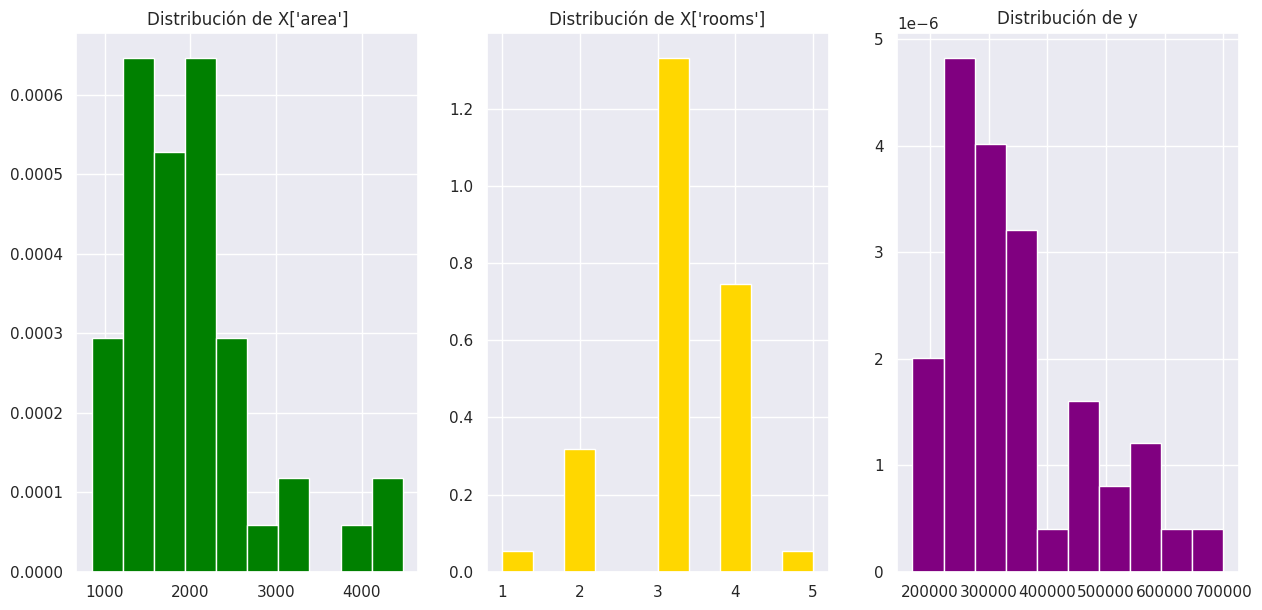

In [29]:
#Vemos como se distribuyen ambos conjuntos de datos X e Y
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(X[:,0],color='green',density=True)
plt.title("Distribución de X['area']")
plt.subplot(1,3,2)
plt.hist(X[:,1],color='gold',density=True)
plt.title("Distribución de X['rooms']")
plt.subplot(1,3,3)
plt.hist(y,color='purple',density=True)
plt.title("Distribución de y");

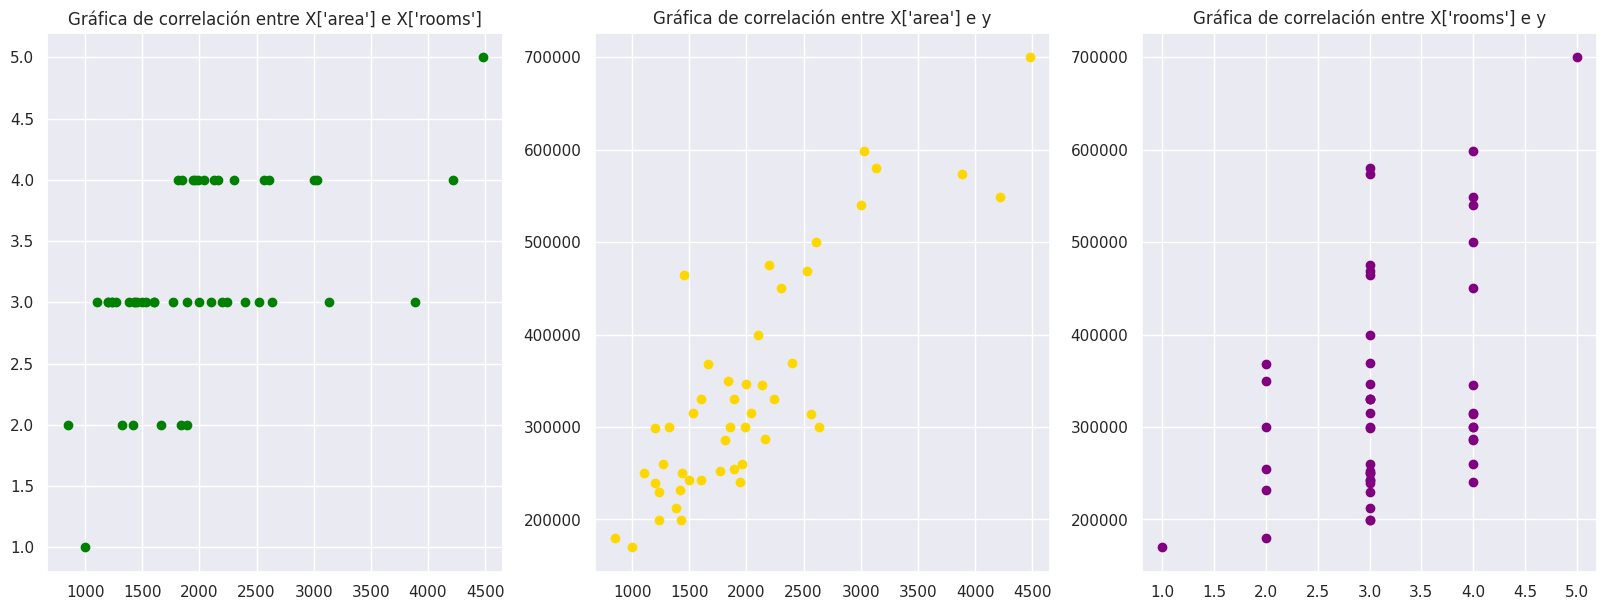

In [30]:
#Vemos si se correlacionan
#Hacemos primero un scatterplot
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],color='green')
plt.title("Gráfica de correlación entre X['area'] e X['rooms']")
plt.subplot(1,3,2)
plt.scatter(X[:,0],y,color='gold')
plt.title("Gráfica de correlación entre X['area'] e y")
plt.subplot(1,3,3)
plt.scatter(X[:,1],y,color='purple')
plt.title("Gráfica de correlación entre X['rooms'] e y");


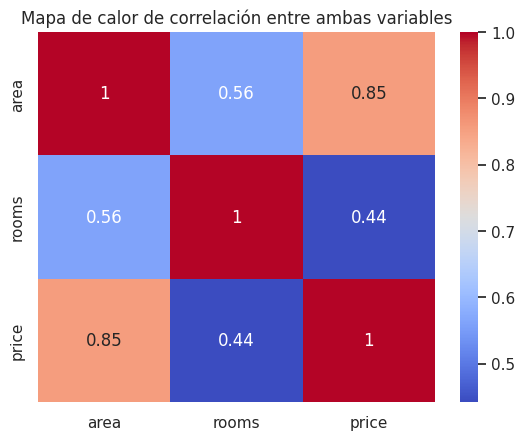

In [31]:
#Luego hacemos un mapa de calor
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

>**Nota:** Vemos que las variables `area` y `rooms` se correlacionan positivamente con el `price`, en mayor medida con respecto al area. Y entre las variables `area` y `rooms` también hay correlacion positiva. Esto resulta bueno ya que nos alienta a que estos datos estan relacionados de forma lineal o aproximadamente lineal.

## 4. Transformamos los datos
En orden de escalar los datos dentro de un mismo rango de valores, conservando su propia distribución, podemos hacerlo con `StandarScaler` o `MinMaxScale` , ambos de Scikit-Learn.

In [32]:
# En lo particular, elegí hacerlo con MinMaxScaler. Transforma todos los datos a la misma escala.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
X.shape

(47, 2)

In [34]:
X_transformed = scaler.fit_transform(X) #escalamos los datos de entrada X con la función .fit_transform()
print(f"X_transformed: {X_transformed.shape}")

X_transformed: (47, 2)


In [36]:
#ploteamos como se ven 5 ejemplos de datos normales vs escalados. ESTO ESTA BUENO PARA REDES NEURONALES.
print(f"X original: {X[:5]}\n")
print(f"X transformed: {X_transformed[:5]}")

X original: [[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]]

X transformed: [[0.34528406 0.5       ]
 [0.20628792 0.5       ]
 [0.42691671 0.5       ]
 [0.1555433  0.25      ]
 [0.59238831 0.75      ]]


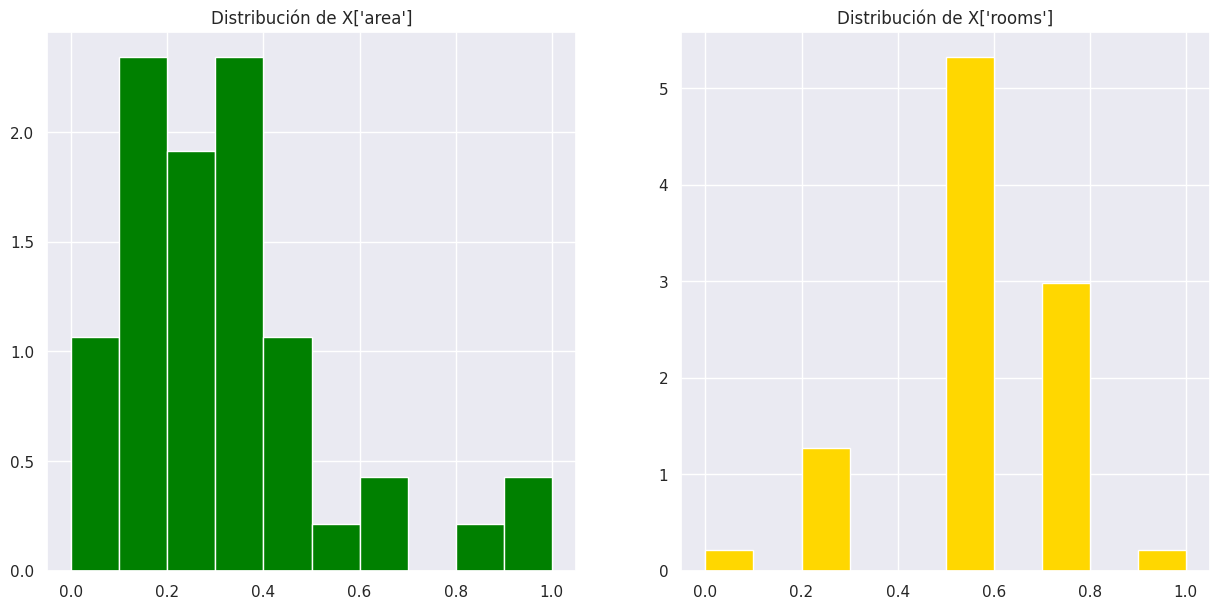

In [37]:
#Vemos como se distribuyen los valores de X_transformed
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(X_transformed[:,0],color='green',density=True)
plt.title("Distribución de X['area']")
plt.subplot(1,2,2)
plt.hist(X_transformed[:,1],color='gold',density=True)
plt.title("Distribución de X['rooms']");

## 5. Separamos el dataset transformado en entrenamiento y testeo

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

In [39]:
#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (35, 2) | ytrain shape (35,)
Xtest shape: (12, 2) | ytest shape (12,)


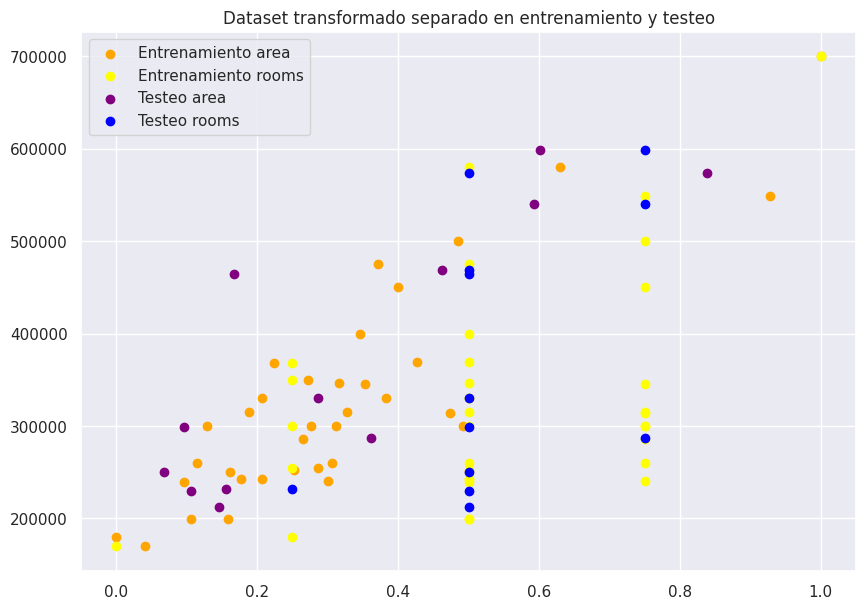

In [40]:
# Vemos gráficamente como queda el dataset transformador separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento area')
plt.scatter(Xtrain[:,1],ytrain,c='yellow',label='Entrenamiento rooms')
plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo area')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo rooms')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo");

## 6. Entrenamos el modelo de regresión simple

In [42]:
# Instanciamos el modelo
multilinear_model = LinearRegression()

In [43]:
multilinear_model.fit(Xtrain,ytrain)

LinearRegression()

In [44]:
#Vemos los coefficientes que "aprendió" o "encontró" el modelo que mejor se ajustan a la relación multiple
print(f"Coeficiente que acompañan a las variables de entrada: {multilinear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {multilinear_model.intercept_}")

Coeficiente que acompañan a las variables de entrada: [515593.50366828 -58468.83433204]
Intercepto que corta al eje de ordenadas: 198509.7352614745


Entonces el modelo final quedaría algo así:

`y = 515593.50366828*X0 -58468.83433204*X1 + 198509.7352614745`

## 7. Evaluamos el modelo lineal

In [45]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {multilinear_model.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {multilinear_model.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.76232397473674
Valor de métrica R2 con el conjunto de testeo: 0.6292083749878664


In [46]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_m_pred = multilinear_model.predict(Xtest)
y_train_m_pred = multilinear_model.predict(Xtrain)
y_test_m_pred.shape, y_train_m_pred.shape

((12,), (35,))

In [47]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_m_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_m_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 64593.2815612483
Valor de métrica MAE con el conjunto de entrenamiento: 46075.14724469954

Valor de métrica MSE con el conjunto de testeo: 7200355501.866975
Valor de métrica MSE con el conjunto de entrenamiento: 3179255295.656091


In [48]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {y.max()} | Price minimo: {y.min()} | Price promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Price maximo: 699900 | Price minimo: 169900 | Price promedio: 340412.6595744681 | Varianza de los datos de entrada X: 1306569.7497736535


In [49]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_m_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

469000 vs 407307.18 --> diferencia = 61692.82 --> error: 13.15%
287000 vs 340931.55 --> diferencia = -53931.55 --> error: -18.79%
464500 vs 255444.56 --> diferencia = 209055.44 --> error: 45.01%
299000 vs 218758.64 --> diferencia = 80241.36 --> error: 26.84%
573900 vs 601259.06 --> diferencia = -27359.06 --> error: -4.77%
229900 vs 224304.19 --> diferencia = 5595.81 --> error: 2.43%
329999 vs 316872.13 --> diferencia = 13126.87 --> error: 3.98%
599000 vs 464497.67 --> diferencia = 134502.33 --> error: 22.45%
539900 vs 460089.67 --> diferencia = 79810.33 --> error: 14.78%
249900 vs 204539.30 --> diferencia = 45360.70 --> error: 18.15%
212000 vs 244353.47 --> diferencia = -32353.47 --> error: -15.26%
232000 vs 264089.64 --> diferencia = -32089.64 --> error: -13.83%


In [50]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 16.62%


>🤔**Para pensar:** El modelo lineal que representa la relación entre los m2 de una vivienda, la cantidad de habitaciones y el precio de la misma posee un error inherente al modelo construido que es una `relación lineal multiple`. Queda en el ingeniero en Machine Learning tener criterio de decidir si un modelo que valua una vivienda con un error de aprox 61919 USD es admisible. O habría que pensar en otra forma de buscar una relación entre los datos de entrada y el precio. Tal vez este modelo a la agencia de bienes raíces no le sirva porque la mayoría de las veces estaría tasando más bajo de lo que sale realmente una vivienda.



---



# Modelos de Machine Learning

Estudiando la regresión lineal simple y múltiple para el caso de la predicción del precio de una viviendo en función de sus características `['arear','m2']` encontramos modelos que se ajustan bien pero de forma lineal, lo cual puede estar introduciendo un error a la hora de testear.

Es por esto que ahora vamos a probar dos modelos clásicos de Machine Learning, que difieren en el cálculo de sus párametros de la regresión lineal.

Estos son:
1. Support Vector Machine (SVM)
2. Decision Trees


> **Aclaración:** Estos modelos clásicos también tienen su aplicación para problemas de `clasificación`, sin embargo también sirven para resolver problemas de `regresión`, como veremos a continuación.

## 1. Support Vector Machines

No solo considera una regresion, sino que es mas tolerante con ciertos valores. Evitamos caer en tantos errores, no seguimos una sola linea.
Va creando vectores de soporte o margenes para crear esa tolerancia.
1. Support Vector Classifier (clasificacion)
2. Support Vector Regressor (regresion)

In [51]:
# Primero cargamos el dataset
# Agrupamos las características en una variable X
# Separamos en entrenamiento y testeo
# Transformamos/normalizamos los datos
data = pd.read_csv('house_price.csv')
X = data.drop(columns='price')
y = data['price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)


In [52]:
from sklearn.svm import SVR #importamos el modelo de support vector regressor (que usa SVM) para hacer regressiones
svr = SVR(kernel='linear',C=6.5,epsilon=0.5,degree=1)
svr.fit(Xtrain,ytrain)

SVR(C=6.5, degree=1, epsilon=0.5, kernel='linear')

In [53]:
#Vemos los mejores parámetros de SVM
svr.get_params()

{'C': 6.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 1,
 'epsilon': 0.5,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Evaluamos SVM

In [54]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {svr.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {svr.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.7440234564321806
Valor de métrica R2 con el conjunto de testeo: 0.5820894467442597


In [55]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_svr_pred = svr.predict(Xtest)
y_train_svr_pred = svr.predict(Xtrain)
y_test_svr_pred.shape, y_train_svr_pred.shape

((12,), (35,))

In [56]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_svr_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_svr_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 67760.18535826074
Valor de métrica MAE con el conjunto de entrenamiento: 46619.00102358693

Valor de métrica MSE con el conjunto de testeo: 8115351988.666878
Valor de métrica MSE con el conjunto de entrenamiento: 3424050788.4643226


In [57]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_svr_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

469000 vs 384582.68 --> diferencia = 84417.32 --> error: 18.00%
287000 vs 339538.61 --> diferencia = -52538.61 --> error: -18.31%
464500 vs 252496.70 --> diferencia = 212003.30 --> error: 45.64%
299000 vs 220588.29 --> diferencia = 78411.71 --> error: 26.22%
573900 vs 553276.76 --> diferencia = 20623.24 --> error: 3.59%
229900 vs 225411.65 --> diferencia = 4488.35 --> error: 1.95%
329999 vs 305924.73 --> diferencia = 24074.27 --> error: 7.30%
599000 vs 447013.06 --> diferencia = 151986.94 --> error: 25.37%
539900 vs 443179.11 --> diferencia = 96720.89 --> error: 17.91%
249900 vs 208220.68 --> diferencia = 41679.32 --> error: 16.68%
212000 vs 242849.97 --> diferencia = -30849.97 --> error: -14.55%
232000 vs 247328.30 --> diferencia = -15328.30 --> error: -6.61%


In [58]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 16.84%


## 2. Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [60]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Evaluamos DTR

In [61]:
#Ahora miramos el R2 usando la función score del modelo entrenado
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {dt.score(Xtrain,ytrain)}")
print(f"Valor de métrica R2 con el conjunto de testeo: {dt.score(Xtest,ytest)}")

Valor de métrica R2 con el conjunto de entrenamiento: 1.0
Valor de métrica R2 con el conjunto de testeo: 0.5876394686966147


In [62]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_dt_pred = dt.predict(Xtest)
y_train_dt_pred = dt.predict(Xtrain)
y_test_dt_pred.shape, y_train_dt_pred.shape

((12,), (35,))

In [63]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_dt_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_dt_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_dt_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_dt_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 69091.66666666667
Valor de métrica MAE con el conjunto de entrenamiento: 0.0

Valor de métrica MSE con el conjunto de testeo: 8007576816.833333
Valor de métrica MSE con el conjunto de entrenamiento: 0.0


In [64]:
# Vemos los datos de precios predecidos cuanto varían con relación a los originales para darnos un sentido de la magnitud del error
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_dt_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

469000 vs 314000.00 --> diferencia = 155000.00 --> error: 33.05%
287000 vs 345000.00 --> diferencia = -58000.00 --> error: -20.21%
464500 vs 249900.00 --> diferencia = 214600.00 --> error: 46.20%
299000 vs 239500.00 --> diferencia = 59500.00 --> error: 19.90%
573900 vs 549000.00 --> diferencia = 24900.00 --> error: 4.34%
229900 vs 199900.00 --> diferencia = 30000.00 --> error: 13.05%
329999 vs 252900.00 --> diferencia = 77099.00 --> error: 23.36%
599000 vs 579900.00 --> diferencia = 19100.00 --> error: 3.19%
539900 vs 579900.00 --> diferencia = -40000.00 --> error: -7.41%
249900 vs 179900.00 --> diferencia = 70000.00 --> error: 28.01%
212000 vs 198999.00 --> diferencia = 13001.00 --> error: 6.13%
232000 vs 299900.00 --> diferencia = -67900.00 --> error: -29.27%


In [65]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 19.51%




---



# Evaluamos gráficamente los modelos

In [66]:
# Definimos una funcion para hacer un resumen de las metricas del modelo y generar una visualizacion de las predicciones y sus desvios:
def model_report(model, y_train_pred, y_test_pred, ytrain = ytrain, ytest = ytest):

    plt.plot(ytrain, ytrain, '-.',c='grey')
    plt.scatter(ytrain, y_train_pred, s=30, c='r', marker='+')
    plt.ylabel("Predicciones")
    plt.xlabel("Valores reales")
    plt.title('ENTRENAMIENTO - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()
    plt.plot(ytest, ytest, '-.',c='grey')
    plt.scatter(ytest, y_test_pred, s=30, c='r', marker='+')
    plt.ylabel("Predicciones")
    plt.xlabel("Valores reales")
    plt.title('TESTEO - Modelo: ' + model.__class__.__name__
              + '\n Comparación entre el modelo y los valores reales de MEDV', fontsize=17, color='b')
    plt.show()

In [67]:
y_test_m_pred.shape,ytest.shape

((12,), (12,))

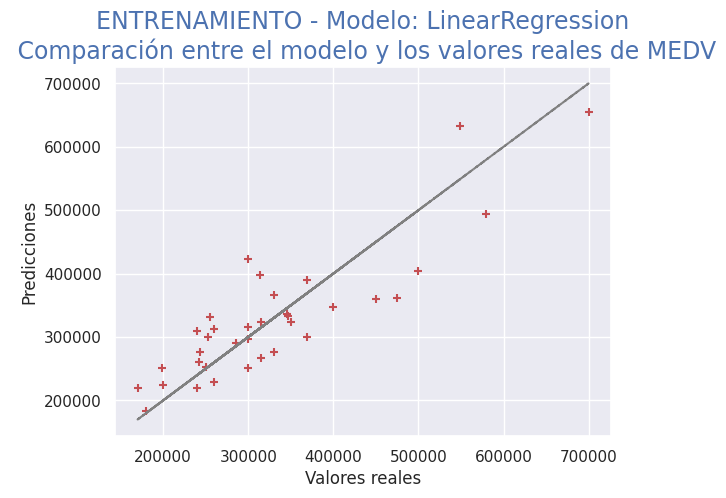

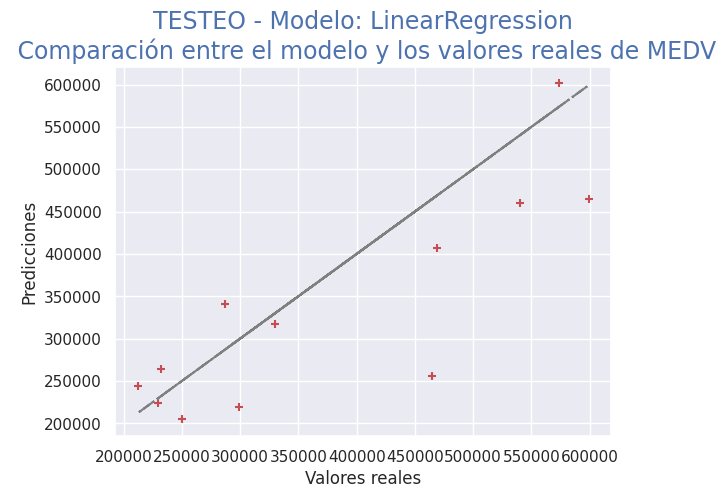

In [68]:
# Aplicamos el reporte al modelo de regresion lineal multivariante
model_report(model = multilinear_model,
             y_train_pred = y_train_m_pred,
             y_test_pred = y_test_m_pred)

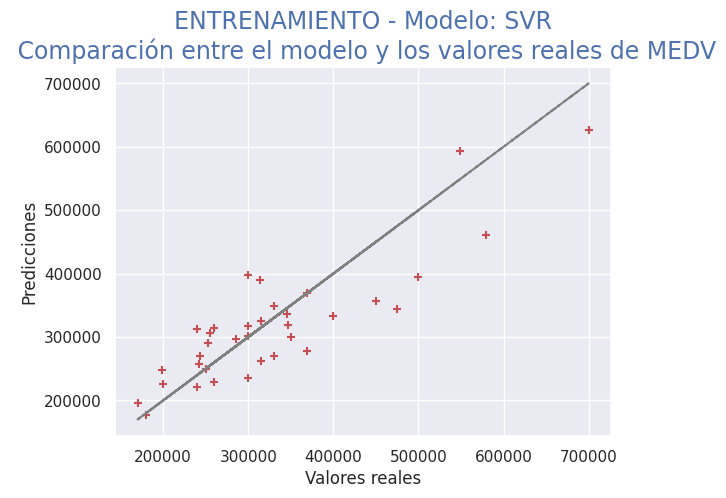

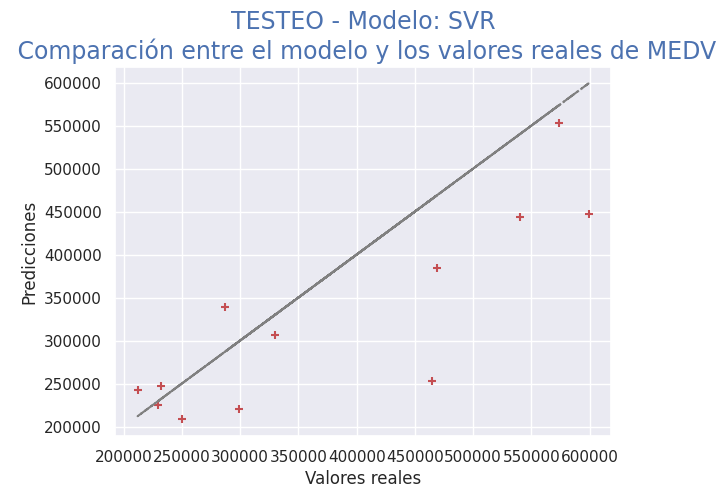

In [69]:
# Aplicamos el reporte al modelo de svr
model_report(model = svr,
             y_train_pred = y_train_svr_pred,
             y_test_pred = y_test_svr_pred)

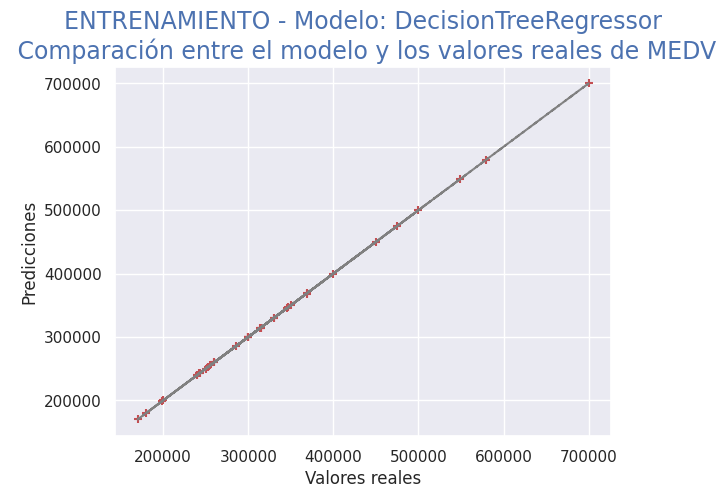

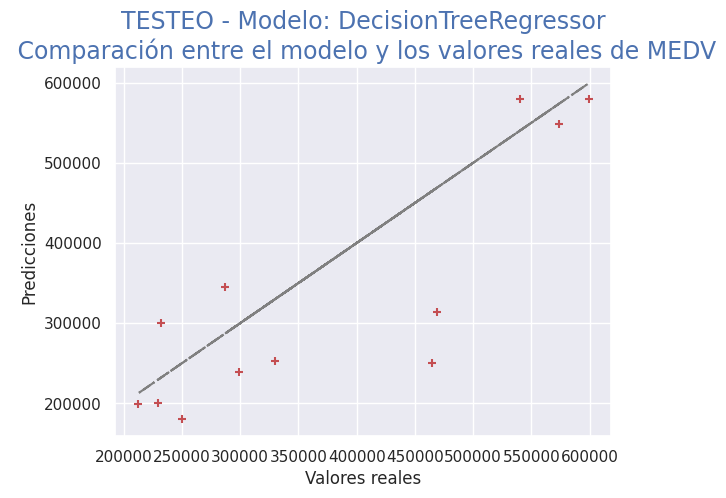

In [70]:
# Aplicamos el reporte al modelo de dt
model_report(model = dt,
             y_train_pred = y_train_dt_pred,
             y_test_pred = y_test_dt_pred)

> 🛠 **Bibliografía recomendada:** [link](http://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf)

> **Ejercicio:** Cargar el dataset que se encuentra en la carpeta por default de Google Colab que se llama `sample_data`, alli hay un conjunto de entrenemiento y testeo que se llama respectivamente `/content/sample_data/california_housing_train.csv` y `/content/sample_data/california_housing_test.csv`

La idea es seguir los pasos de:
1. Cargar los datasets.
2. Explorar los datos (distribuciones, tipo de data, valores nulos `df.isna().sum()`, correlacion, pairplot, etc)
3. Elegir las variables.
4. Si es necesario normalizar [0,1] usando `MinMaxScaler` de sklearn.
5. Elegir un modelo de regresion.
6. Entrenar.
7. Evaluar el modelo.
8. Hacer prediccion.
9. Calcular metricas de prediccion.